## Lab5 (Optional)
In this lab, you are expected to study the provided code below which uses a dummy dataset to create three classifiers using Decision Trees, Bagged-Decision Trees, and Random Forests. 

In Bagged-Decision Trees and Random Forest models, the parameter n_estimators indicates the number of decision trees. Also, in Random Forests, parameter max_features is used to randomize the features. 

Manipulate the above-mentioned parameters and find out which value would prevent overfitting the model? Also, using the last plot, based on your manipulation, which feature(s) show to be more important? Do research to find out how feature importance is calculated in the Random Forest model and what does it indicate? Explain the role of feature importance in Ranforest Models.

In [46]:
import pandas as pd

# Load the dataset
df = pd.read_csv('small_dataset.csv')

#Print the number of input features
n_features = df.shape[1] - 1

print(n_features)
# Display the first few rows
print(df.head())


3
   Feature1  Feature2  Feature3  Target
0       2.5       3.1       1.2       0
1       1.0       2.3       3.3       1
2       3.3       4.4       2.1       0
3       1.5       2.8       3.6       1
4       3.0       3.5       1.8       0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score

# Split the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_features_list = ['log2', 'sqrt', None, 1, 2, 3]

decision_tree_max = 0;
# Train a single decision tree
for param in num_features_list:
    tree = DecisionTreeClassifier(random_state=42, max_features = param)
    tree.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_tree = tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    if accuracy_tree > decision_tree_max:
        decision_tree_max = accuracy_tree
    print(f'Single Decision Tree Accuracy: {accuracy_tree:.2f}| max_features = {str(param)}')


Single Decision Tree Accuracy: 0.67| max_features = log2
Single Decision Tree Accuracy: 0.67| max_features = sqrt
Single Decision Tree Accuracy: 0.67| max_features = None
Single Decision Tree Accuracy: 0.67| max_features = 1
Single Decision Tree Accuracy: 0.67| max_features = 2
Single Decision Tree Accuracy: 0.67| max_features = 3


Based on the above code, all of the max_features values possible are equally helpful in preventing overfitting, as they all lead to the same accuracy.

In [48]:
from sklearn.ensemble import BaggingClassifier
bag_max = 0
# Create a bagged decision tree model
for n in range (1,15,1):
    bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n, random_state=42)
    bagged_tree.fit(X_train, y_train)
    # Predict and evaluate
    y_pred_bagged = bagged_tree.predict(X_test)
    accuracy_bagged = accuracy_score(y_test, y_pred_bagged)
    if accuracy_bagged > bag_max:
        bag_max = accuracy_bagged
    print(f'Bagged Decision Trees Accuracy: {accuracy_bagged:.2f}| n_estimators = {str(n)}')


Bagged Decision Trees Accuracy: 1.00| n_estimators = 1
Bagged Decision Trees Accuracy: 0.67| n_estimators = 2
Bagged Decision Trees Accuracy: 0.67| n_estimators = 3
Bagged Decision Trees Accuracy: 0.67| n_estimators = 4
Bagged Decision Trees Accuracy: 1.00| n_estimators = 5
Bagged Decision Trees Accuracy: 1.00| n_estimators = 6
Bagged Decision Trees Accuracy: 1.00| n_estimators = 7
Bagged Decision Trees Accuracy: 1.00| n_estimators = 8
Bagged Decision Trees Accuracy: 1.00| n_estimators = 9
Bagged Decision Trees Accuracy: 0.67| n_estimators = 10
Bagged Decision Trees Accuracy: 1.00| n_estimators = 11
Bagged Decision Trees Accuracy: 0.67| n_estimators = 12
Bagged Decision Trees Accuracy: 0.67| n_estimators = 13
Bagged Decision Trees Accuracy: 0.67| n_estimators = 14


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

Based on the above code, a n_estimators vale of 1 is best as preventing overfitting, as it has a 100% accuracy score and is also the least complicated model.

In [53]:
from sklearn.ensemble import RandomForestClassifier
import math
rf_max = 0
for n in range(1,12,1):

    random_forest = RandomForestClassifier(max_features =math.ceil(math.sqrt(n_features)) , n_estimators=n, random_state=42)
    random_forest.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    if accuracy_rf > rf_max:
        rf_max = accuracy_rf
    print(f'Random Forest Accuracy: {accuracy_rf:.2f}| n_estimators = {str(n)}')


random_forest = RandomForestClassifier(max_features =math.ceil(math.sqrt(n_features)) , n_estimators=5, random_state=42)
random_forest.fit(X_train, y_train)
    
# Predict and evaluate
y_pred_rf = random_forest.predict(X_test)


Random Forest Accuracy: 0.33| n_estimators = 1
Random Forest Accuracy: 0.33| n_estimators = 2
Random Forest Accuracy: 0.67| n_estimators = 3
Random Forest Accuracy: 0.67| n_estimators = 4
Random Forest Accuracy: 1.00| n_estimators = 5
Random Forest Accuracy: 1.00| n_estimators = 6
Random Forest Accuracy: 1.00| n_estimators = 7
Random Forest Accuracy: 0.67| n_estimators = 8
Random Forest Accuracy: 1.00| n_estimators = 9
Random Forest Accuracy: 0.67| n_estimators = 10
Random Forest Accuracy: 0.67| n_estimators = 11


Based on the above code, a n_estimators value of 5 is best as preventing overfitting, as it has a 100% accuracy score and is also the least complicated model with 100% accuracy.

In [50]:
print("Comparison of Model Accuracies:")
print(f'Single Decision Tree Accuracy: {decision_tree_max:.2f}')
print(f'Bagged Decision Trees Accuracy: {bag_max:.2f}')
print(f'Random Forest Accuracy: {rf_max:.2f}')

# Discuss the results


Comparison of Model Accuracies:
Single Decision Tree Accuracy: 0.67
Bagged Decision Trees Accuracy: 1.00
Random Forest Accuracy: 1.00


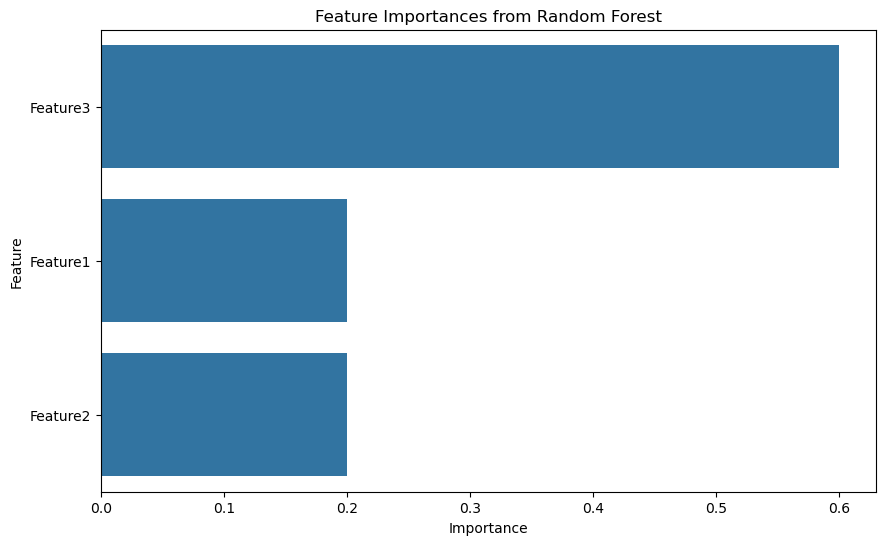

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_
features = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


Based on my updated code, with n_estimators = 5, the most important feature is feature 3.
Feature importance is computed as the (normalized) total reduction of the criterion brought by that feature -- i.e. how much a feature contributes to reducing prediction error. It is also known as the Gini importance, which measures total decrease in Gini impurity brought by a feature across all trees and splits. Features leading to better splits closer to the root of the tree are more important.
High importance indicates that a feature significantly impacs model decisions and predictive accuracy, making them worth investigating further (and vice versa for features with low importance).
Low importance features can be removed to remove noise, simplifying the model and reducing overfitting.